In [157]:
from __future__ import print_function, division

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [158]:
import seaborn as sns
sns.set()

In [159]:
plv_hist = np.genfromtxt ('plv_hist.csv', delimiter=",")
plv_pi = np.genfromtxt ('plv_pi.csv', delimiter=",")
nino3_hist = np.genfromtxt ('tas_Amon_IPSL-CM5A-LR_past1000_r1i1p1_0850_1850_1_nino3_tseries.csv', delimiter=",")
nino3_pi = np.genfromtxt ('tas_Amon_IPSL-CM5A-LR_piControl_r1i1p1_180001-279912_1_nino3_tseries.csv', delimiter=",")

print(plv_hist.shape)
print(plv_pi.shape)
print(nino3_hist.shape)
print(nino3_pi.shape)


(11976,)
(11964,)
(12012,)
(12000,)


In [160]:
#data = pd.DataFrame(data, columns=['x', 'y'])
plv = np.zeros((plv_pi.shape[0], 2))
plv[:,0] = plv_pi[:]
plv[:,1] = plv_hist[0:11964]
#print(plv.shape)
plv_data = pd.DataFrame(plv, columns=['plv_pi', 'plv_hist'])
xy_line = (0, 1)

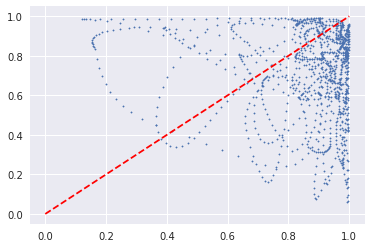

In [161]:
#Test plot
#plv_pi_1_100 = plv[1:1200,0]
#plv_hist_1_100 = plv[1:1200,1]
#plv_pi_1_100[plv_pi_1_100<0.8] = 0.0
#plv_hist_1_100[plv_hist_1_100<0.8] = 0.0
plt.scatter(plv[0:1200,0],plv[0:1200,1],s=2)
plt.plot(xy_line, 'r--')
plt.savefig('plv_pi_1_100_plv_hist_1_100.eps', format='eps', dpi=1000)
#plt.scatter(plv_pi_1_100,plv_hist_1_100)

(8400,)
(8400,)


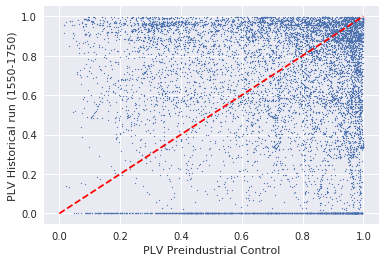

In [162]:
plv_hist_1 = plv_hist[8400:10800]
#print(plv_pi_1.shape)

#plv_pi_1 = np.zeros((9600))
plv_pi_1 = plv_pi[2400:10800]
print(plv_pi_1.shape)

plv_hist_2 = np.zeros((8400))
print(plv_hist_2.shape)

plv_hist_2[0:2400] = plv_hist_1[0:2400]
plv_hist_2[2400:4800] = plv_hist_1[0:2400]
plv_hist_2[4800:7200] = plv_hist_1[0:2400]
#plv_hist_2[7200:9600] = plv_hist_1[0:2400]

#plv_pi_1[plv_pi_1<0.8]=np.nan
#plv_hist_2[plv_hist_2<0.8]=np.nan

plt.scatter(plv_pi_1,plv_hist_2,s=1)
plt.plot(xy_line, 'r--')
plt.xlabel('PLV Preindustrial Control')
plt.ylabel('PLV Historical run (1550-1750)')
plt.savefig('plv_pi_hist_final.eps', format='eps', dpi=1000)
#print(plv_hist_2[0:2400])
#print(plv_hist_2[2400:4800])
#print(plv_hist_1[0:2400])
#print(plv_hist_2)



In [163]:
thres = 0.9
plv_pi_1[plv_pi_1<thres] = 0
plv_hist_2[plv_hist_2<thres] = 0

plv_pi_1[plv_pi_1>thres] = 1
plv_hist_2[plv_hist_2>thres] = 1

plv_hist_1[plv_hist_1<thres] = 0
plv_hist_1[plv_hist_1>thres] = 1

print(np.sum(plv_pi_1[0:2400]))
print(np.sum(plv_hist_1))

839.0
799.0


In [35]:
def moving_average(a, n=240) :
    #print(a.shape[0],n)
    ret = np.zeros((a.shape[0]-n))
    for i in range(ret.shape[0]):
        #print(i)
        ret[i] = a[i+np.int(n/2)] - np.sum(a[i:i+n])/n
    return ret

In [36]:
nino3_hist_anom = moving_average(nino3_hist)
nino3_pi_anom = moving_average(nino3_pi)
#print(nino3_hist_anom)

In [83]:
nino3_hist_anom_1550_1650 = nino3_hist_anom[8280:10680]
nino3_pi_anom_1550_1650 = nino3_pi_anom[8280:10680]

elnino_hist = np.zeros((2400))
lanina_hist = np.zeros((2400))

elnino_pi = np.zeros((2400))
lanina_pi = np.zeros((2400))

print(nino3_hist_anom_1550_1650.shape)

(2400,)


In [84]:
for i in range(elnino_hist.shape[0]):
    if nino3_hist_anom_1550_1650[i]>0.5 and plv_hist_1[i]>0.8:
        elnino_hist[i] = elnino_hist[i] + 1.0
    if nino3_hist_anom_1550_1650[i]<-0.5 and plv_hist_1[i]>0.8:
        lanina_hist[i] = lanina_hist[i] + 1.0
    if nino3_pi_anom_1550_1650[i]>0.5 and plv_pi_1[i+7000]>0.8:
        elnino_pi[i] = elnino_pi[i] + 1.0
    if nino3_pi_anom_1550_1650[i]<-0.5 and plv_pi_1[i+7000]>0.8:
        lanina_pi[i] = lanina_pi[i] + 1.0

In [85]:
print(np.sum(elnino_hist))
print(np.sum(lanina_hist))

307.0
302.0


In [86]:
print(np.sum(elnino_pi))
print(np.sum(lanina_pi))

282.0
247.0


In [168]:
import random
#random.sample(range(0, 9599), 2400)
random.sample(range(1, 100), 3)

[83, 8, 32]

In [171]:
plv_hist[83]

0.82057780894099996

In [177]:
plv_hist[random.sample(range(1, 100), 3)]

array([ 0.76296803,  0.94817445,  0.8051779 ])